In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from matplotlib.colors import LogNorm

In [32]:
list_of_modelbase_sals = np.loadtxt('base')
list_of_modelv18_sals = np.loadtxt('v18')
list_of_ferrybase_sals = np.loadtxt('ferry')

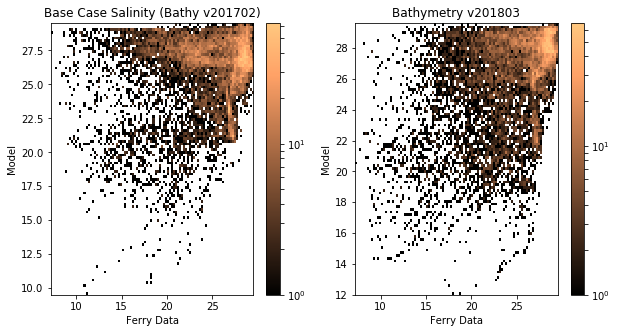

In [33]:
fig, axs = plt.subplots(1, 2, figsize = (10,5))
c, xedge, yedge, im = axs[0].hist2d(list_of_ferrybase_sals, 
                                list_of_modelbase_sals, bins = 100, norm=LogNorm(), cmap='copper')
im
fig.colorbar(im, ax=axs[0])
axs[0].set_xlabel('Ferry Data')
axs[0].set_ylabel('Model')
axs[0].set_title('Base Case Salinity (Bathy v201702)')

c, xedge, yedge, im = axs[1].hist2d(list_of_ferrybase_sals, 
                                list_of_modelv18_sals, bins = 100, norm=LogNorm(), cmap='copper')
im
fig.colorbar(im, ax=axs[1])
axs[1].set_xlabel('Ferry Data')
axs[1].set_ylabel('Model')
axs[1].set_title('Bathymetry v201803');

In [34]:
print('bias =  ' + str(-np.mean(list_of_ferrybase_sals) + np.mean(list_of_modelbase_sals)))
print('RMSE = ' + str(np.sqrt(np.sum((list_of_modelbase_sals - list_of_ferrybase_sals)**2) 
                              / len(list_of_modelbase_sals))))
xbar = np.mean(list_of_ferrybase_sals)
print('Willmott = ' + str(1-(np.sum((list_of_modelbase_sals - list_of_ferrybase_sals)**2)  / 
                             np.sum((np.abs(list_of_modelbase_sals - xbar) 
                                     + np.abs(list_of_ferrybase_sals - xbar))**2))))

print('bias =  ' + str(-np.mean(list_of_ferrybase_sals) + np.mean(list_of_modelv18_sals)))
print('RMSE = ' + str(np.sqrt(np.sum((list_of_modelv18_sals - list_of_ferrybase_sals)**2) 
                              / len(list_of_modelv18_sals))))

print('Willmott = ' + str(1-(np.sum((list_of_modelv18_sals - list_of_ferrybase_sals)**2)  / 
                             np.sum((np.abs(list_of_modelv18_sals - xbar) 
                                     + np.abs(list_of_ferrybase_sals - xbar))**2))))

bias =  1.45786955143
RMSE = 4.73662333696
Willmott = 0.517264182543
bias =  1.59858772895
RMSE = 4.26466559428
Willmott = 0.641990927206


|  Salinity         | Bias          | RMSE          | WS             |
|-----------|---------------|---------------|----------------|
| Base Case | 1.52707575253 | 5.24464144716 | 0.777509231541 |
| Test A    | 1.94161838071 | 5.56267806197 | 0.743195687801 |
| Test B    | 1.79176312479 | 5.34840517666 | 0.767047886945 |